In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from IPython.display import display
import random

In [2]:
df = pd.read_csv(r"preprocessed_laptop_ver2.csv")
df.drop(labels = ['Intel_gpu', 'AMD_gpu', 'NVIDIA_gpu'], axis=1, inplace=True)

In [3]:
df.head(10)

,name,brand,cpu_name,cpu_brand,cpu_core_num,cpu_thread_num,gpu,weight,battery,monitor_size,...,monitor_refresh_rate,connection_type_c,connection_usb_a,connection_thunderbolt,ram_capacity,ram_type,ram_speed,HDD_capacity,SSD_capacity,price
0,Sạc Macbook Hyperjuice Ultimate Charger 110W D...,Other,Intel Core i5 1235U,Intel,10.0,12.0,Intel Iris Xe Graphics,1.400,39.3,14.0,...,60.0,1.0,1.0,0,8.0,DDR4,3200.0,0.0,512.0,3590000.0
1,Ghế Công Thái Học HyperWork HW01 (Arm 3D - Gray),Other,Intel Core i5 11300H,Intel,4.0,8.0,Intel Iris Xe Graphics,1.743,58.0,14.4,...,120.0,2.0,0.0,0,16.0,NaN,4266.0,0.0,512.0,3790000.0
2,Màn hình chuyên đồ hoạ ViewSonic VG2755-2K (QH...,Other,AMD Ryzen R5-5625U,AMD,6.0,12.0,AMD Radeon Graphics,1.700,39.3,15.6,...,NaN,1.0,1.0,0,8.0,DDR4,3200.0,0.0,512.0,7790000.0
3,Asus Vivobook X515 (Chính Hãng) (X515MA-BR481T),Asus,Intel Celeron N4020,Intel,2.0,2.0,Intel UHD Graphics,NaN,37.0,15.6,...,60.0,1.0,3.0,0,4.0,DDR4,3200.0,1024.0,256.0,7990000.0
4,ASUS Vivobook X515JA,Asus,Intel Core i3 1005G1,Intel,2.0,4.0,Intel UHD Graphics,1.800,37.0,15.6,...,NaN,1.0,2.0,0,8.0,NaN,3200.0,0.0,256.0,8990000.0
5,Lenovo IdeaPad 3 14 Intel (Nhập khẩu) (81WD00U...,Lenovo,Intel Core i3 1005G1,Intel,2.0,4.0,Intel UHD G1,1.600,35.0,14.0,...,60.0,0.0,3.0,0,4.0,DDR4,2666.0,0.0,128.0,8990000.0
6,Surface Pro 6,Microsoft,Intel Core i5 8250U,Intel,4.0,8.0,Intel UHD 620,0.770,45.0,12.3,...,60.0,0.0,1.0,0,8.0,LPDDR3,2133.0,0.0,128.0,9990000.0
7,Lenovo ThinkPad T480,Lenovo,Intel Core i5 8350U,Intel,4.0,8.0,Intel UHD 620,1.600,48.0,14.0,...,60.0,2.0,2.0,1,8.0,DDR4,2400.0,0.0,256.0,9990000.0
8,HP ZBook Studio G3,HP,Intel Xeon E3 1545M,Intel,4.0,8.0,"Intel UHD Graphics, Nvidia Quadro M1000m",2.000,64.0,15.6,...,60.0,2.0,2.0,0,16.0,DDR4,2133.0,0.0,512.0,9990000.0
9,Dell Inspiron 15 3501,Dell,Intel Core i3 1115G4,Intel,2.0,4.0,Intel UHD Graphics,1.960,42.0,15.6,...,60.0,0.0,3.0,0,8.0,NaN,2666.0,0.0,256.0,9990000.0


In [4]:
df['battery'].replace(10, np.NaN, inplace=True)

In [5]:
len(df)

560

In [6]:
df.isnull().sum()

name                           0
brand                          0
cpu_name                       0
cpu_brand                      0
cpu_core_num                   7
cpu_thread_num                17
gpu                            3
weight                        55
battery                       15
monitor_size                   2
monitor_resolution_x          11
monitor_resolution_y          11
monitor_panel                 18
monitor_display              309
monitor_torch_screen           0
monitor_blue_light_filter      0
monitor_LED_backlit            0
monitor_anti_glare             0
monitor_sRGB                 264
monitor_refresh_rate          93
connection_type_c              0
connection_usb_a               0
connection_thunderbolt         0
ram_capacity                   2
ram_type                     132
ram_speed                     41
HDD_capacity                   0
SSD_capacity                   0
price                          0
dtype: int64

In [7]:
pd.DataFrame(df.nunique())

,0
name,560
brand,17
cpu_name,177
cpu_brand,3
cpu_core_num,8
cpu_thread_num,10
gpu,199
weight,130
battery,68
monitor_size,19


### Check column properties

In [8]:
df.columns

Index(['name', 'brand', 'cpu_name', 'cpu_brand', 'cpu_core_num',
       'cpu_thread_num', 'gpu', 'weight', 'battery', 'monitor_size',
       'monitor_resolution_x', 'monitor_resolution_y', 'monitor_panel',
       'monitor_display', 'monitor_torch_screen', 'monitor_blue_light_filter',
       'monitor_LED_backlit', 'monitor_anti_glare', 'monitor_sRGB',
       'monitor_refresh_rate', 'connection_type_c', 'connection_usb_a',
       'connection_thunderbolt', 'ram_capacity', 'ram_type', 'ram_speed',
       'HDD_capacity', 'SSD_capacity', 'price'],
      dtype='object')

In [9]:
# Columns and their respective dtypes

df.dtypes

name                          object
brand                         object
cpu_name                      object
cpu_brand                     object
cpu_core_num                 float64
cpu_thread_num               float64
gpu                           object
weight                       float64
battery                      float64
monitor_size                 float64
monitor_resolution_x         float64
monitor_resolution_y         float64
monitor_panel                 object
monitor_display               object
monitor_torch_screen           int64
monitor_blue_light_filter      int64
monitor_LED_backlit            int64
monitor_anti_glare             int64
monitor_sRGB                 float64
monitor_refresh_rate         float64
connection_type_c            float64
connection_usb_a             float64
connection_thunderbolt         int64
ram_capacity                 float64
ram_type                      object
ram_speed                    float64
HDD_capacity                 float64
S

In [10]:
categorical_cols = ["monitor_panel", "monitor_display", "monitor_torch_screen", 
                    "monitor_blue_light_filter", "monitor_LED_backlit",
                    "monitor_anti_glare", "ram_type", "connection_type_c", "connection_usb_a", 
                    "connection_thunderbolt", "cpu_core_num", "cpu_thread_num", "ram_capacity", "cpu_brand"]

string_cols = ["name", "brand", "cpu_name", "gpu", "monitor_panel", "monitor_display", "ram_type", "cpu_brand"]

continuous_cols = list(set(df.columns).difference(categorical_cols + string_cols))
continuous_cols.remove("price")

numerics_cols = list(set(df.columns).difference(string_cols))
numerics_cols.remove("price")

### Price column EDA

In [120]:
# assert that the target doesn't contain any null

df['price'].isnull().sum()

0

In [121]:
df[['price']].describe()

,price
count,5.600000e+02
mean,2.930837e+07
std,1.860500e+07
min,3.590000e+06
25%,1.789000e+07
50%,2.314000e+07
75%,3.399000e+07
max,1.399900e+08


Text(0.5, 1.0, 'Laptop Price')

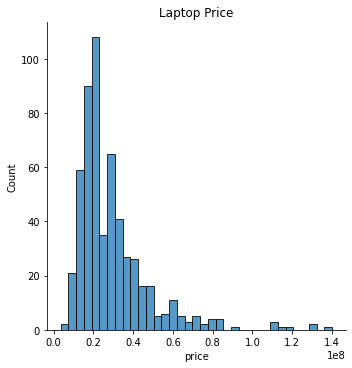

In [122]:
sns.displot(df['price'])
plt.title("Laptop Price")

#### Correlation of price vs other numerical column

Text(0.5, 1.0, 'Correlation maxtrix')

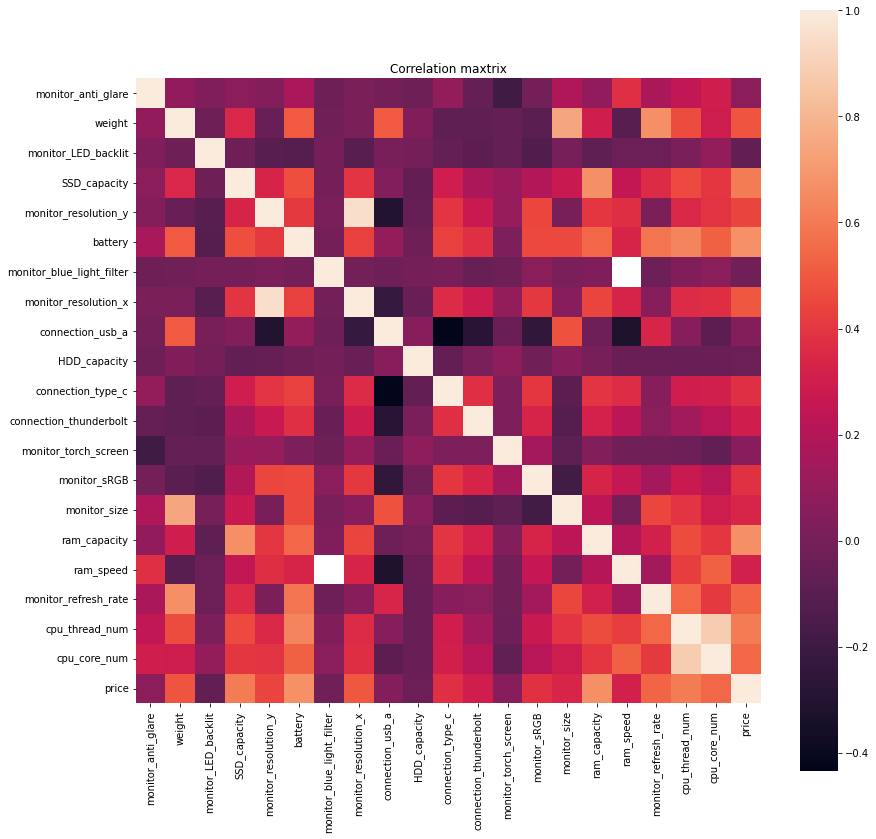

In [123]:
corrmat = df[numerics_cols + ["price"]].corr()
f, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(corrmat, vmax=1, square=True)
ax.set_title("Correlation maxtrix")

##### Sort correlation in descending

In [124]:
abs(corrmat['price']).sort_values(ascending=False)

price                        1.000000
battery                      0.670910
ram_capacity                 0.664424
cpu_thread_num               0.606414
SSD_capacity                 0.605040
cpu_core_num                 0.540280
monitor_refresh_rate         0.533630
monitor_resolution_x         0.498584
weight                       0.487299
monitor_resolution_y         0.440872
monitor_sRGB                 0.381054
connection_type_c            0.374253
monitor_size                 0.333107
ram_speed                    0.314053
connection_thunderbolt       0.303378
monitor_anti_glare           0.072263
monitor_LED_backlit          0.070832
monitor_torch_screen         0.053522
connection_usb_a             0.043000
HDD_capacity                 0.038405
monitor_blue_light_filter    0.018739
Name: price, dtype: float64

### Explore numerical features

In [125]:
df[numerics_cols].describe()

,monitor_anti_glare,weight,monitor_LED_backlit,SSD_capacity,monitor_resolution_y,battery,monitor_blue_light_filter,monitor_resolution_x,connection_usb_a,HDD_capacity,connection_type_c,connection_thunderbolt,monitor_torch_screen,monitor_sRGB,monitor_size,ram_capacity,ram_speed,monitor_refresh_rate,cpu_thread_num,cpu_core_num
count,560.000000,505.000000,560.000000,560.000000,549.000000,545.000000,560.000000,549.000000,560.000000,560.000000,560.000000,560.000000,560.0000,296.000000,558.000000,558.000000,519.000000,467.000000,543.000000,553.000000
mean,0.223214,1.726519,0.010714,548.942857,1257.533698,59.785083,0.003571,2146.116576,1.937500,7.325000,1.446429,0.430357,0.2500,88.043243,14.795161,12.874552,3511.472062,97.012848,11.622468,6.712477
std,0.416773,0.491323,0.103046,357.821470,324.147913,16.852167,0.059708,491.792254,0.983598,105.835249,0.715773,0.495569,0.4334,16.965107,1.109399,7.574551,860.258031,58.985121,4.355852,3.204188
min,0.000000,0.736000,0.000000,0.000000,768.000000,32.000000,0.000000,1080.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,11.600000,4.000000,0.000000,60.000000,2.000000,2.000000
25%,0.000000,1.350000,0.000000,256.000000,1080.000000,48.000000,0.000000,1920.000000,1.000000,0.000000,1.000000,0.000000,0.0000,65.000000,14.000000,8.000000,3200.000000,60.000000,8.000000,4.000000
50%,0.000000,1.660000,0.000000,512.000000,1080.000000,56.000000,0.000000,1920.000000,2.000000,0.000000,1.000000,0.000000,0.0000,100.000000,15.000000,8.000000,3200.000000,60.000000,12.000000,6.000000
75%,0.000000,2.100000,0.000000,512.000000,1440.000000,70.000000,0.000000,2256.000000,3.000000,0.000000,2.000000,1.000000,0.2500,100.000000,15.600000,16.000000,4266.000000,144.000000,16.000000,8.000000
max,1.000000,4.100000,1.000000,4096.000000,2400.000000,100.000000,1.000000,3840.000000,4.000000,2048.000000,4.000000,1.000000,1.0000,100.000000,17.300000,64.000000,6400.000000,360.000000,24.000000,16.000000


#### Plot against "price" 

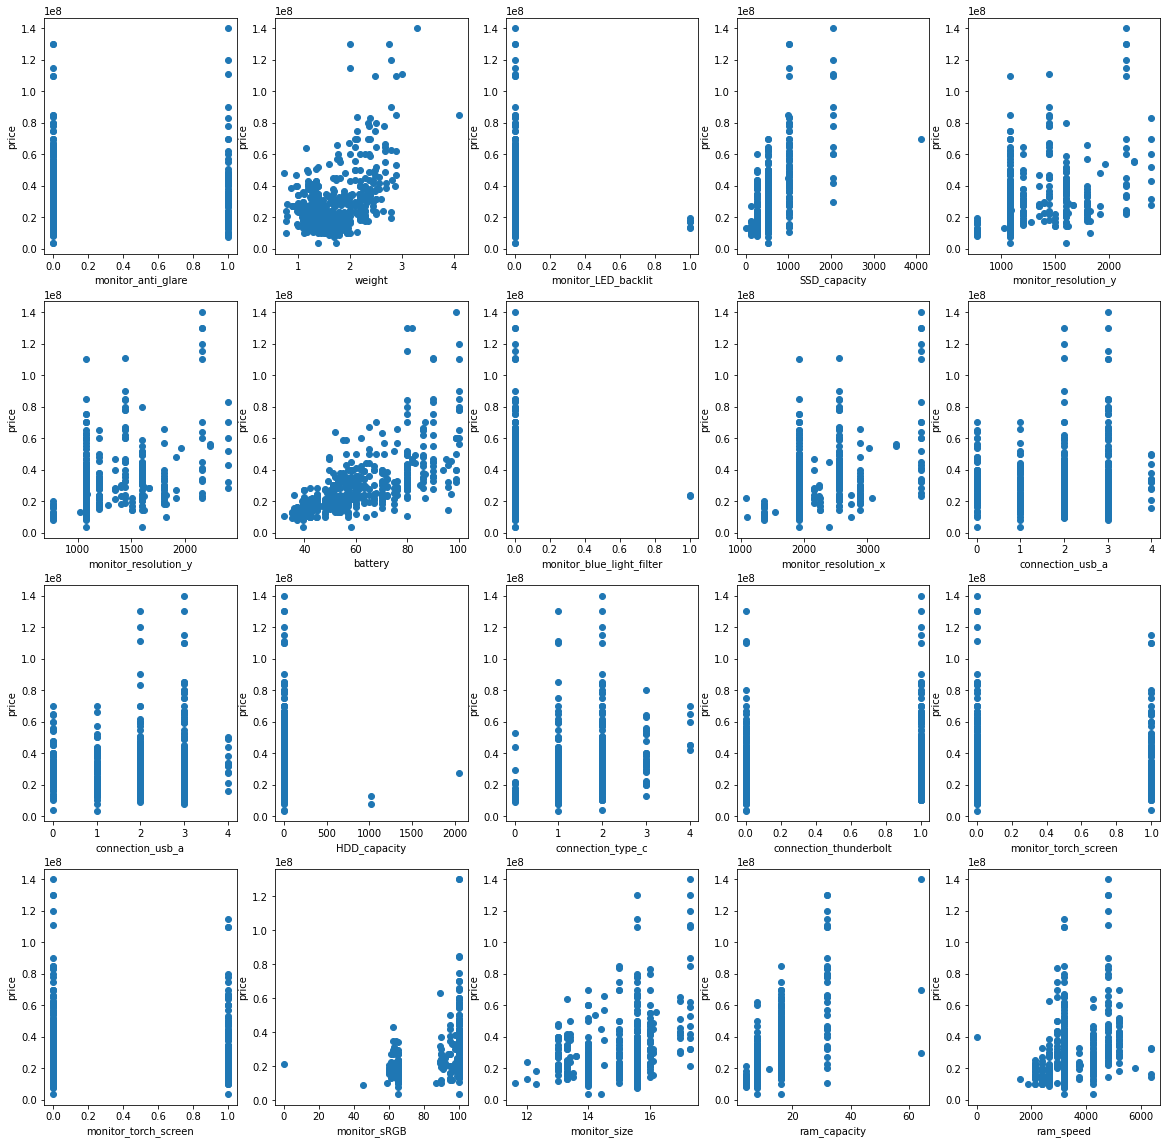

In [126]:
fig, ax = plt.subplots(4, 5, figsize=(20, 20))
for i in range(4):
    for j in range(5):
        ax[i, j].scatter(df[numerics_cols[i * 4 + j]], df['price'])
        ax[i, j].set_xlabel(numerics_cols[i * 4 + j])
        ax[i, j].set_ylabel("price")

#### We'll explore features with highest correlation with price

In [35]:
top_features = ["battery", "ram_capacity", "cpu_thread_num", "SSD_capacity", "cpu_core_num", "monitor_refresh_rate"]

In [13]:
def plot_groupby(col: str, fig_size = (25, 5)):
    print("Value count of {}".format(col))
    print(df[col].value_counts().sort_values())
    sns.displot(df[col])
    sns.boxplot(y = 'price', x = col, data = df)
    # list_of_unique_item = df[col].unique()
    # list_of_unique_item = list_of_unique_item[~pd.isna(list_of_unique_item)]
    # list_of_unique_item = sorted(list_of_unique_item)
    # fig, axes = plt.subplots(1, len(list_of_unique_item), figsize = fig_size)
    # item_group = df.groupby(col)
    # for i, item in enumerate(list_of_unique_item):
    #     sns.boxplot(y = 'price', data = item_group.get_group(item), ax=axes[i])
    #     axes[i].set_xlabel("{}: {}".format(col, item))  

##### Battery

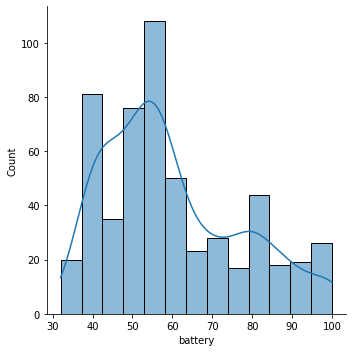

In [14]:
sns.displot(df['battery'], kde=True)

##### Ram capacity

In [15]:
# print("Value count of ram capacity")
# print(df['ram_capacity'].value_counts().sort_values())
# sns.displot(df['ram_capacity'])

In [16]:
# list_of_ram_capacity = df['ram_capacity'].unique()
# list_of_ram_capacity = list_of_ram_capacity[~np.isnan(list_of_ram_capacity)]
# list_of_ram_capacity = sorted(list_of_ram_capacity)
# fig, axes = plt.subplots(1, len(list_of_ram_capacity), figsize = (25, 5))
# ram_capacity_group = df.groupby("ram_capacity")
# for i, ram in enumerate(list_of_ram_capacity):
#     if np.isnan(ram) == False:
#         sns.boxplot(y = 'price', data = ram_capacity_group.get_group(ram), ax=axes[i])
#         axes[i].set_xlabel("Ram capacity: {}".format(ram))
#         axes[i].set

Value count of ram_capacity
12.0      1
64.0      3
4.0      25
32.0     37
16.0    220
8.0     272
Name: ram_capacity, dtype: int64


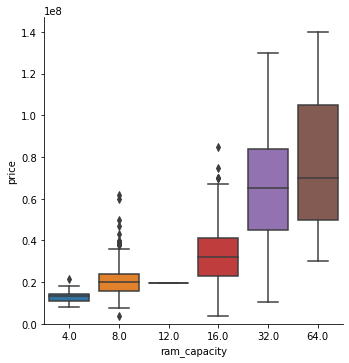

In [17]:
plot_groupby("ram_capacity")

##### SSD Capacity

In [18]:
# print("Value count of ram capacity")
# print(df['SSD_capacity'].value_counts().sort_values())
# sns.displot(df['SSD_capacity'])

In [19]:
# list_of_SSD_capacity = df['SSD_capacity'].unique()
# list_of_SSD_capacity = list_of_SSD_capacity[~np.isnan(list_of_SSD_capacity)]
# list_of_SSD_capacity = sorted(list_of_SSD_capacity)
# fig, axes = plt.subplots(1, len(list_of_SSD_capacity), figsize = (25, 5))
# ssd_capacity_group = df.groupby("SSD_capacity")
# for i, ssd in enumerate(list_of_SSD_capacity):
#     if np.isnan(ssd) == False:
#         sns.boxplot(y = 'price', data = ssd_capacity_group.get_group(ssd), ax=axes[i])
#         axes[i].set_xlabel("SSD capacity: {}".format(ssd))

Value count of SSD_capacity
0.0         1
4096.0      1
1000.0      2
128.0      10
2048.0     13
1024.0     68
256.0     134
512.0     331
Name: SSD_capacity, dtype: int64


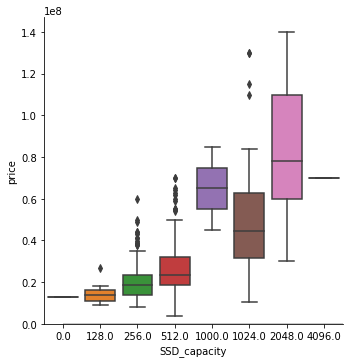

In [20]:
plot_groupby("SSD_capacity")

##### CPU thread num

Value count of cpu_thread_num
15.0      1
2.0       1
14.0      1
24.0      5
6.0       6
20.0     27
4.0      32
12.0    124
16.0    150
8.0     196
Name: cpu_thread_num, dtype: int64


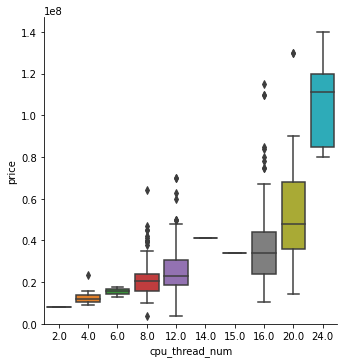

In [21]:
plot_groupby("cpu_thread_num")

#### CPU core num

Value count of cpu_core_num
16.0      6
10.0     23
14.0     28
2.0      31
12.0     39
6.0     104
8.0     138
4.0     184
Name: cpu_core_num, dtype: int64


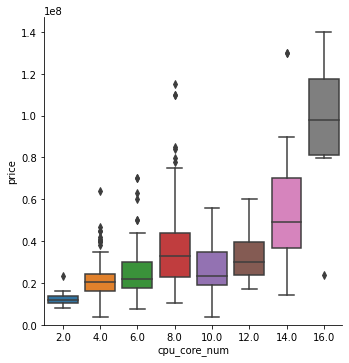

In [22]:
plot_groupby("cpu_core_num")

### Explore string features

In [30]:
name = df['cpu_name'].str.split(" ")

In [31]:
intel_cpu = []
apple_cpu = []
amd_cpu = []
ryzen_cpu = []

for i, x in enumerate(name):
    if x[0] in ['Core', 'Intel', 'Intel®']:
        intel_cpu.append(i)
    elif x[0] == "AMD" or x[0] == "Ryzen":
        amd_cpu.append(i)
    elif x[0] == "Apple":
        apple_cpu.append(i)
    # elif x[0] == "Ryzen":
    #     ryzen_cpu.append(i)

assert len(intel_cpu) + len(apple_cpu) + len(amd_cpu) + len(ryzen_cpu) == len(df), "Number of CPU is not equal to df length"
print("Number of Intel cpu: {}".format(len(intel_cpu)))
print("Number of Apple cpu: {}".format(len(apple_cpu)))
print("Number of AMD cpu: {}".format(len(amd_cpu)))
# print("Number of Ryzen cpu: {}".format(len(ryzen_cpu)))

Number of Intel cpu: 403
Number of Apple cpu: 16
Number of AMD cpu: 141


<AxesSubplot:xlabel='cpu_brand', ylabel='price'>

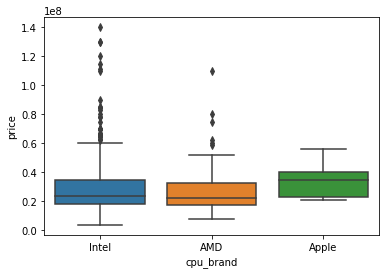

In [32]:
# fig, axes = plt.subplots(1, 3, figsize=(20, 5))
sns.boxplot(y = "price", x = "cpu_brand", data = df)
# sns.boxplot(y = "price", data = df.iloc[intel_cpu], ax = axes[0]).set(ylabel = "intel cpu laptop price")
# sns.boxplot(y = "price", data = df.iloc[apple_cpu], ax = axes[1]).set(ylabel = "apple_cpu laptop price")
# sns.boxplot(y = "price", data = df.iloc[amd_cpu], ax = axes[2]).set(ylabel = "amd_cpu laptop price")
# sns.boxplot(y = "price", data = df.iloc[ryzen_cpu], ax = axes[3]).set(ylabel = "ryzen_cpu laptop price")

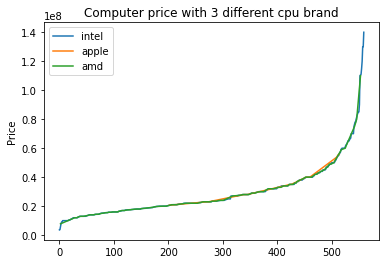

In [33]:
plt.plot(df.iloc[intel_cpu]['price'], label = "intel")
plt.plot(df.iloc[apple_cpu]['price'], label = "apple")
plt.plot(df.iloc[amd_cpu]['price'], label = "amd")
# plt.plot(df.iloc[ryzen_cpu]['price'], label = "ryzen")
plt.title("Computer price with 3 different cpu brand")
plt.ylabel("Price")
plt.legend()

#### Ram type

Value count of ram_type
DDR5-4800 SO-DIMM      1
DDR3L                  1
LPDDR3L                1
LPDDDR5                1
LPDDR3                13
LPDDR4x               25
LPDDR5                26
DDR5                  45
DDR4                 315
Name: ram_type, dtype: int64


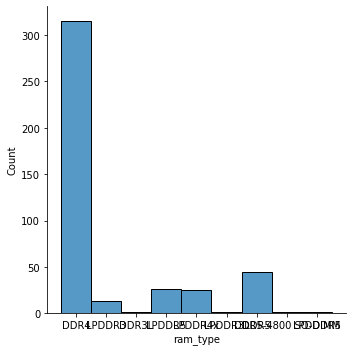

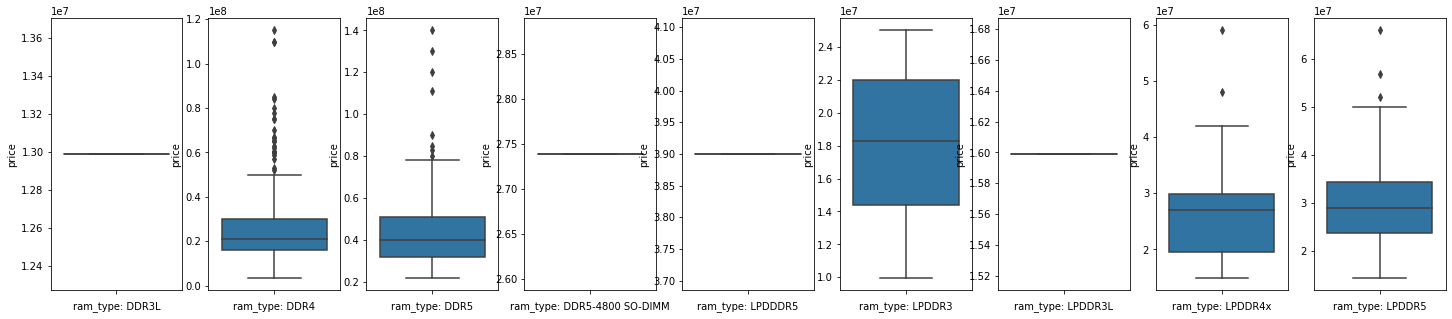

In [118]:
plot_groupby("ram_type")